In [10]:
import csv
import datetime
import matplotlib.pyplot as plt

In [11]:
# Funcion para definir rango de fechas
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

In [12]:
# Extraccion de datos a la fecha
dia = '29'
mes = '05'
filename = 'datos_mexico/20' + mes + dia + 'COVID19MEXICO.csv' 
fecha_inicio_pandemia = datetime.date(2020, 3, 1)
fecha_actualizacion = datetime.date(2020, 5, 29)

In [13]:
# Diccionarion que relaciona indice en la list con ente al que se refiere.
indice_dict = {0:'FECHA_ACTUALIZACION', 
               1:'ID', 
               2:'ORIGEN', 
               3:'SECTOR', 
               4:'ENTIDAD', 
               5:'SEXO', 
               6:'ENTIDAD_NAC', 
               7:'ENTIDAD_RES', 
               8:'MUNICIPIO_RES', 
               9:'TIPO_PACIENTE', 
               10:'FECHA_INGRESO', 
               11:'FECHA_SINTOMAS', 
               12:'FECHA_DEF', 
               13:'INTUBADO', 
               14:'NEUMONIA', 
               15:'EDAD', 
               16:'NACIONALIDAD', 
               17:'EMBARAZO', 
               18:'HABLA_LENGUA_INDIG', 
               19:'DIABETES', 
               20:'EPOC', 
               21:'ASMA', 
               22:'INMUSUPR', 
               23:'HIPERTENSION', 
               24:'OTRA_COM', 
               25:'CARDIOVASCULAR', 
               26:'OBESIDAD', 
               27:'RENAL_CRONICA', 
               28:'TABAQUISMO', 
               29:'OTRO_CASO', 
               30:'RESULTADO', 
               31:'MIGRANTE', 
               32:'PAIS_NACIONALIDAD', 
               33:'PAIS_ORIGEN', 
               34:'UCI'}

In [14]:
datos_covid_raw = []
with open(filename, 'r', encoding='mac_roman') as file:
    reader = csv.reader(file)
    for row in reader:
        datos_covid_raw.append(row)

In [23]:
# Extraccion de casos positivos y defunciones
num_pruebas = len(datos_covid_raw)
num_defunciones = 0
datos_covid_positivos = []
for i in range(num_pruebas):
    resultado = datos_covid_raw[i][30]
    if resultado == '1':
        fecha_ingreso = datetime.date(*map(int, datos_covid_raw[i][10].split('-')))
        fecha_sintomas = datetime.date(*map(int, datos_covid_raw[i][11].split('-')))
        if datos_covid_raw[i][12] == '9999-99-99':
            fecha_defuncion = 0
        else:
            fecha_defuncion = datetime.date(*map(int, datos_covid_raw[i][12].split('-')))
            num_defunciones = num_defunciones + 1
        datos_covid_positivos.append([fecha_ingreso, fecha_sintomas, fecha_defuncion])
        
num_casos_positivos = len(datos_covid_positivos)

In [39]:
# Calculo de casos activos por dia (calculados como los casos confirmados 
# que iniciaron síntomas en un periodo de 14 días anterior a la fecha establecida)
datos_covid_activos = []
for fecha in daterange(fecha_inicio_pandemia, fecha_actualizacion):
    covid_activos = 0
    for i in range(num_casos_positivos):
        fecha_sintomas = datos_covid_positivos[i][1]
        fecha_defuncion = datos_covid_positivos[i][2]
        # Si no hubo defuncion y cumplen con el criterio de activo, contarlos
        if (fecha_defuncion) == 0 and (fecha >= fecha_sintomas) and ( (fecha - fecha_sintomas).days <=14):
            covid_activos = covid_activos + 1
    datos_covid_activos.append([fecha, covid_activos])
    #print(fecha.strftime("%Y-%m-%d"))

In [40]:
datos_covid_activos

[[datetime.date(2020, 3, 1), 17],
 [datetime.date(2020, 3, 2), 26],
 [datetime.date(2020, 3, 3), 30],
 [datetime.date(2020, 3, 4), 37],
 [datetime.date(2020, 3, 5), 43],
 [datetime.date(2020, 3, 6), 51],
 [datetime.date(2020, 3, 7), 71],
 [datetime.date(2020, 3, 8), 88],
 [datetime.date(2020, 3, 9), 147],
 [datetime.date(2020, 3, 10), 196],
 [datetime.date(2020, 3, 11), 246],
 [datetime.date(2020, 3, 12), 303],
 [datetime.date(2020, 3, 13), 383],
 [datetime.date(2020, 3, 14), 468],
 [datetime.date(2020, 3, 15), 555],
 [datetime.date(2020, 3, 16), 668],
 [datetime.date(2020, 3, 17), 756],
 [datetime.date(2020, 3, 18), 863],
 [datetime.date(2020, 3, 19), 954],
 [datetime.date(2020, 3, 20), 1102],
 [datetime.date(2020, 3, 21), 1199],
 [datetime.date(2020, 3, 22), 1291],
 [datetime.date(2020, 3, 23), 1454],
 [datetime.date(2020, 3, 24), 1541],
 [datetime.date(2020, 3, 25), 1657],
 [datetime.date(2020, 3, 26), 1807],
 [datetime.date(2020, 3, 27), 1988],
 [datetime.date(2020, 3, 28), 2127],


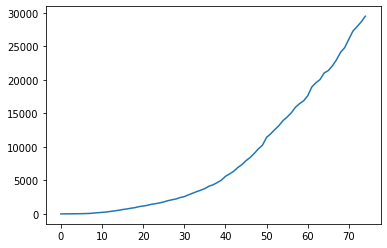

In [42]:
# Grafica de casos activos (sin tomar en cuenta los ultimos 14 dias que son estadisticamente inexactos)
array_casos_activos = []
array_dia = []
for i in range(len(datos_covid_activos)-14): 
    array_dia.append(i)
    array_casos_activos.append(datos_covid_activos[i][1])
plt.plot(array_dia, array_casos_activos)

In [19]:
num_casos_positivos

84627

In [21]:
(fecha_actualizacion - fecha_inicio_pandemia).days

89